<a href="https://colab.research.google.com/github/Haritha-PV/Hear-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAJOR PROJECT**

# **HEART FAILURE PREDICTION**

The ability to predict heart disease through data analysis offers a promising avenue to potentially enhance prevention and management strategies.Here we determine whether a patient is at risk of developing heart disease, based on multiple factors.The approch aimed at uncovering insights and identifying trends within the data. This is followed by feature selection and data scaling to refine the data for optimal model performance. Subsequently, we deploy a series of machine learning models to predict heart failure occurrence in patients.

# Imorting essential libraries

In [7]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Mounting the drive

In [9]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#file location
file_path='/content/drive/MyDrive/Heart failure prediction AND Internship/heart.csv'

# Reading the Data

In [11]:
#importing the dataset
dataset=pd.read_csv(file_path)

In [12]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
dataset.shape

(918, 12)

In [15]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# **Dataset Features**
**Age**: age of the patient [years]

**Sex**: sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: resting blood pressure [mm Hg]

**Cholesterol**: serum cholesterol [mm/dl]

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease**: output class [1: heart disease, 0: Normal]

# Unique Values

In [16]:
#Checking unique values for each variable
print(dataset.apply(lambda col: col.unique()))

Age               [40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...
Sex                                                          [M, F]
ChestPainType                                   [ATA, NAP, ASY, TA]
RestingBP         [140, 160, 130, 138, 150, 120, 110, 136, 115, ...
Cholesterol       [289, 180, 283, 214, 195, 339, 237, 208, 207, ...
FastingBS                                                    [0, 1]
RestingECG                                        [Normal, ST, LVH]
MaxHR             [172, 156, 98, 108, 122, 170, 142, 130, 120, 9...
ExerciseAngina                                               [N, Y]
Oldpeak           [0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...
ST_Slope                                           [Up, Flat, Down]
HeartDisease                                                 [0, 1]
dtype: object


In [17]:
dataset.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Duplicate Value

In [19]:
dataset.duplicated().value_counts()
#true is for duplicate values

False    918
dtype: int64

There is no duplicate values.

# Missing Values

In [20]:
null_df=pd.DataFrame(dataset.isna().sum()).rename(columns={0:'Number of null values'})
print(null_df)

                Number of null values
Age                                 0
Sex                                 0
ChestPainType                       0
RestingBP                           0
Cholesterol                         0
FastingBS                           0
RestingECG                          0
MaxHR                               0
ExerciseAngina                      0
Oldpeak                             0
ST_Slope                            0
HeartDisease                        0


There is no null values in the dataset.

In [21]:
#Missing values
missing_values=dataset.isnull().sum().sort_values(ascending=False)
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There is no missing values.

# Data Analysis and Visualisation

Crossplotting heartdisease and sex column

<Axes: xlabel='HeartDisease'>

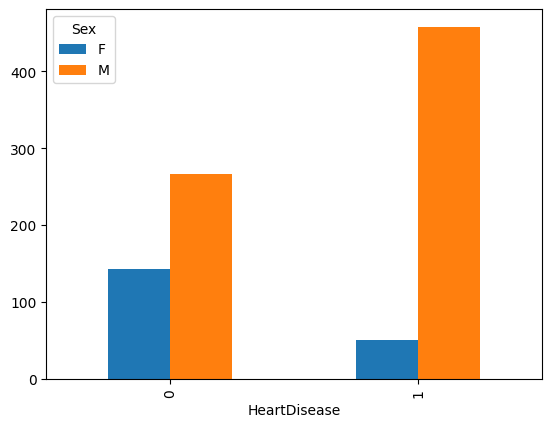

In [22]:
pd.crosstab(dataset.HeartDisease, dataset.Sex).plot(kind='bar')

Target variables

Text(0.5, 1.0, '% of Cases of Heart Disease')

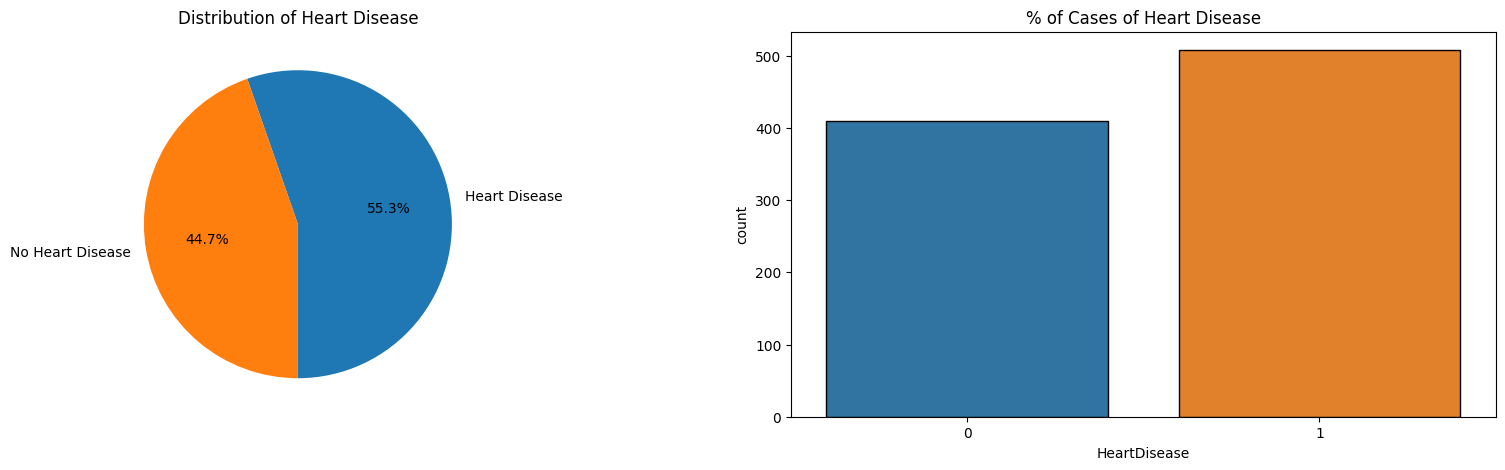

In [23]:
value_counts = dataset["HeartDisease"].value_counts()
labels = ['Heart Disease' if i==1 else 'No Heart Disease' for i in value_counts.index]
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle = 270)
plt.title('Distribution of Heart Disease')
plt.ylabel('')

colors=['tab:blue','tab:orange']
plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data = dataset,palette=colors,edgecolor = 'black')
plt.title('% of Cases of Heart Disease')


categorical value

In [24]:
categorical = dataset.select_dtypes(include=['object'])
categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


# Incorrect cholestrol values

In [25]:
zero_cholesterol=dataset[dataset['Cholesterol']==0].shape[0]
print('Number of patients with zero cholestrol:',zero_cholesterol)
print('percent of dataset:',(round(zero_cholesterol/dataset.shape[0],2))*100)

Number of patients with zero cholestrol: 172
percent of dataset: 19.0


The incorrect values in cholesterol column takes upto 19% of the data.
So dropping the entire row with zero cholesterol  or finding the mean and median value replacing it with zero is another way.


In [26]:
#median_cholesterol = dataset[dataset['Cholesterol'] != 0]['Cholesterol'].median()

#replace zeros with the calculated median value
#dataset.loc[dataset['Cholesterol'] == 0, 'Cholesterol'] = median_cholesterol



#mean_cholesterol = dataset[dataset['Cholesterol'] != 0]['Cholesterol'].mean()

#replace zeros with the calculated median value
#dataset.loc[dataset['Cholesterol'] == 0, 'Cholesterol'] = mean_cholesterol



#237 is the obtained value for replacing zero.

It is better to drop the raws than to take mean and median value which will vary the performance.

In [27]:
#Dropping the entire row with cholestrol=0

dataset= dataset[dataset['Cholesterol'] != 0]

In [28]:
dataset.shape


(746, 12)

SO about 172 rows are being eliminated that is almost 20% of the given data.

Text(0.5, 1.0, '% of Cases of Heart Disease')

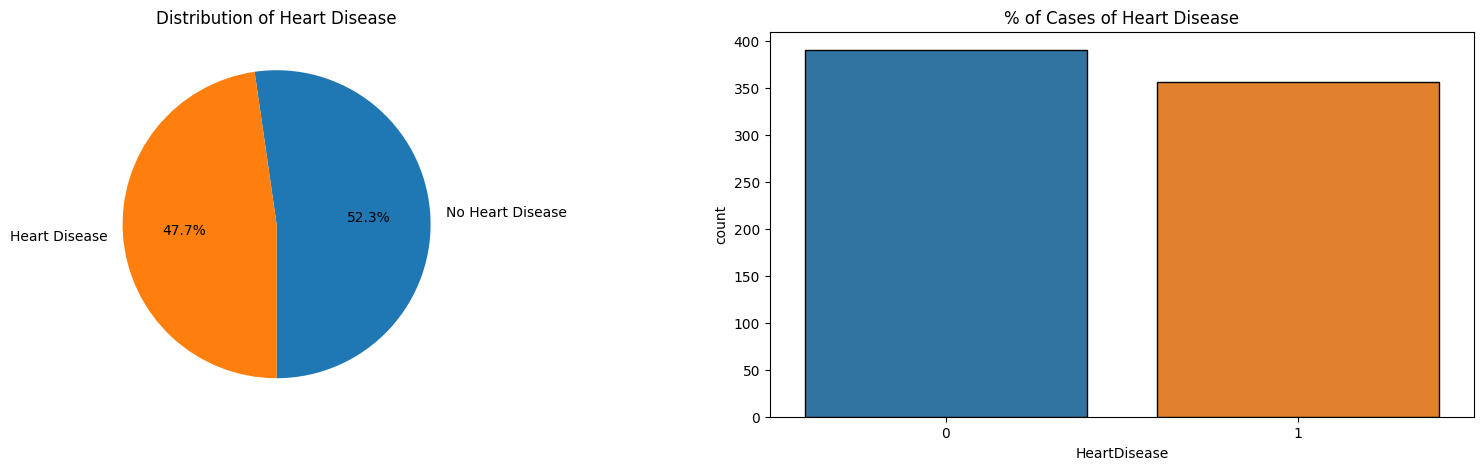

In [29]:
value_counts = dataset["HeartDisease"].value_counts()
labels = ['Heart Disease' if i==1 else 'No Heart Disease' for i in value_counts.index]
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle = 270)
plt.title('Distribution of Heart Disease')
plt.ylabel('')

colors=['tab:blue','tab:orange']
plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data = dataset,palette=colors,edgecolor = 'black')
plt.title('% of Cases of Heart Disease')


After the elimination of rows there is a slight change in the distribution of heart disease,patient with heart disease increased to 47.75%,patient with no haert disease decreased to 52.3%.

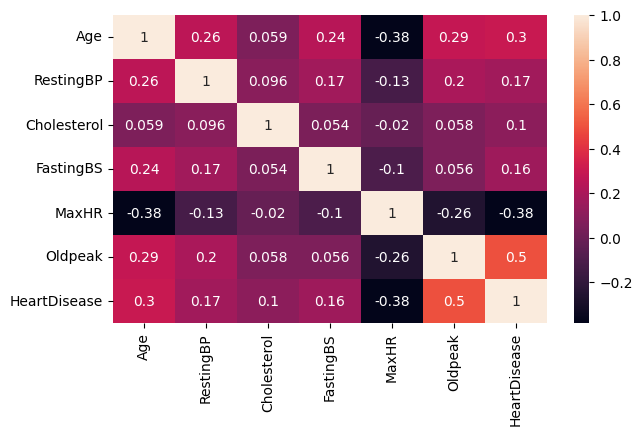

In [30]:
plt.figure(figsize=(7,4))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Highest correlation observed is 0.29.

In [31]:
import plotly.express as px

# Outliers

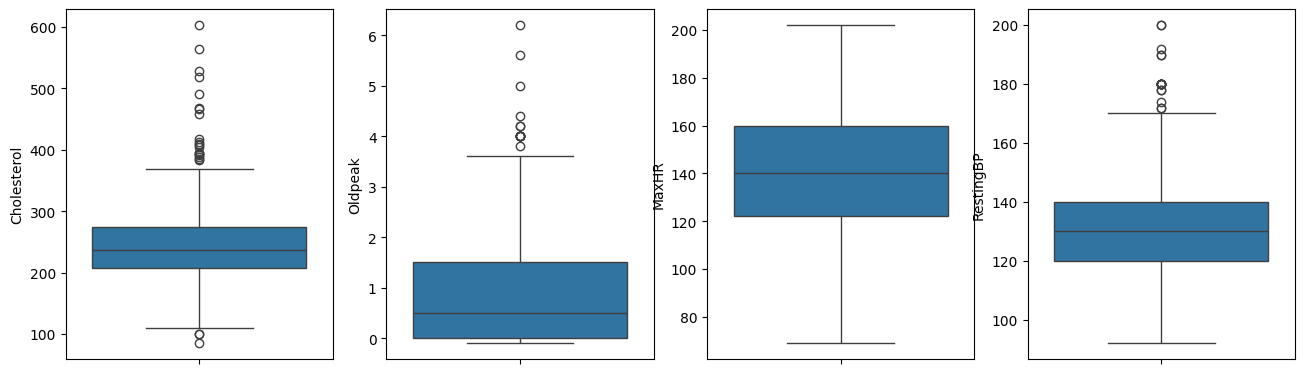

In [32]:
# plotting boxplot to identify outliers
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(y='Cholesterol',data=dataset)
plt.subplot(2,5,2)
sns.boxplot(y='Oldpeak',data=dataset)
plt.subplot(2,5,3)
sns.boxplot(y='MaxHR',data=dataset)
plt.subplot(2,5,4)
sns.boxplot(y='RestingBP',data=dataset)
plt.show()

We can see that outliers are there in cholestrol,Oldpeak,RestingBP.There is no outlier for MaxHR.

In [33]:
#Removing outliers of cholestrol
# 25th and 75th percentile of the values in enginesize column
Q1_es = dataset.Cholesterol.quantile(0.25)
Q3_es = dataset.Cholesterol.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
dataset = dataset[(dataset.Cholesterol < upper_es)]

In [34]:
dataset.shape

(726, 12)

In [35]:
#Removing outliers of Oldpeak
# 25th and 75th percentile of the values in enginesize column
Q1_es = dataset.Oldpeak.quantile(0.25)
Q3_es = dataset.Oldpeak.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
dataset = dataset[(dataset.Oldpeak < upper_es)]

In [36]:
dataset.shape

(712, 12)

In [37]:
#Removing outliers of RestingBP
# 25th and 75th percentile of the values in enginesize column
Q1_es = dataset.RestingBP.quantile(0.25)
Q3_es = dataset.RestingBP.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
dataset = dataset[(dataset.RestingBP< upper_es)]

In [38]:
dataset.shape

(684, 12)

There occured a change in dataset after removing outliers,from 746 rows came to 684.

In [39]:
# converting to dummies
#dummies = pd.get_dummies(categorical,drop_first=True)
#dummies.head()

In [40]:
# concat the dummies dataframe to the main dataframe
#dataset = pd.concat([dataset,dummies],axis=1)

# dropping all the categorical columns as the dummies are already created

#dataset.drop(columns=categorical.columns,inplace=True)

# Label Encoder

In [41]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
#Converting categorical data into numerical values
dataset["Sex"]=le.fit_transform(dataset["Sex"])
dataset["ChestPainType"]=le.fit_transform(dataset["ChestPainType"])
dataset["RestingECG"]=le.fit_transform(dataset["RestingECG"])
dataset["ExerciseAngina"]=le.fit_transform(dataset["ExerciseAngina"])
dataset["ST_Slope"]=le.fit_transform(dataset["ST_Slope"])

In [43]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Train test split

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [45]:
x=dataset.drop(columns='HeartDisease')
y=dataset.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [46]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
813,69,0,3,140,239,0,1,151,0,1.8,2
915,57,1,0,130,131,0,1,115,1,1.2,1
856,39,1,2,140,321,0,0,182,0,0.0,2
754,57,1,0,132,207,0,1,168,1,0.0,2
29,51,1,1,125,188,0,1,145,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
454,58,1,0,136,203,1,1,123,1,1.2,1
540,62,1,2,138,204,0,2,122,1,1.2,1
894,58,0,0,130,197,0,1,131,0,0.6,1
651,61,1,0,140,207,0,0,138,1,1.9,2


In [47]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
136,43,0,1,120,215,0,2,175,0,0.0,2
663,66,1,1,160,246,0,1,120,1,0.0,1
570,56,1,0,128,223,0,2,119,1,2.0,0
522,50,1,0,144,349,0,0,120,1,1.0,2
12,39,1,1,120,204,0,1,145,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
646,66,1,0,160,228,0,0,138,0,2.3,2
680,57,1,0,150,276,0,0,112,1,0.6,1
622,59,1,0,110,239,0,0,142,1,1.2,1
728,54,0,2,135,304,1,1,170,0,0.0,2


# SVM Model

In [48]:
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_pred= svm_model.predict(X_test)

In [49]:
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[89 24]
 [44 49]]


True Negatives (TN): 85
False Positives (FP): 29
False Negatives (FN): 43
True Positives (TP): 49

In [50]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.6699029126213593


Accuracy is 65%.

In [51]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       113
           1       0.67      0.53      0.59        93

    accuracy                           0.67       206
   macro avg       0.67      0.66      0.66       206
weighted avg       0.67      0.67      0.66       206



 The model appears to perform reasonably well, with a balanced trade-off between precision and recall, especially for class 0. However, the performance for class 1 (lower recall and f1-score) might be an area for improvement, depending on the specific goals and requirements of the classification task.

# KNN Modeling

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8349514563106796
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       113
           1       0.86      0.75      0.80        93

    accuracy                           0.83       206
   macro avg       0.84      0.83      0.83       206
weighted avg       0.84      0.83      0.83       206

[[102  11]
 [ 23  70]]


In Knn model accuracy is 83.9%.The model demonstrates improved performance with higher precision, recall, and F1-scores for both classes, as well as a higher overall accuracy. This suggests that the model is making more accurate predictions for both classes in this evaluation.